# <font color=orange>Final Project: "Concrete Strength" </font>

# <font color=pink>Jarred Morgan </font>

# <font color=pink>Juhair Alam </font>

# <font color=pink>Abrar Bari </font>

In [ ]:
###Analyse an existing concrete compressive strength database and build a data model to predict the compressive strength of a concrete mixture.

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn

In [2]:
data = pd.read_excel("concreteData.xlsx")
data

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [3]:
concrete = pd.DataFrame(data)
concrete

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


In [4]:
concrete.info()
concrete.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cement               1030 non-null   float64
 1   Blast Furnace Slag   1030 non-null   float64
 2   Fly Ash              1030 non-null   float64
 3   Water                1030 non-null   float64
 4   Superplasticizer     1030 non-null   float64
 5   Coarse Aggregate     1030 non-null   float64
 6   Fine Aggregate       1030 non-null   float64
 7   Age                  1030 non-null   int64  
 8   CC Strength          1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


**At first we changed the column names directly from the excel file and uploaded it using pandas function. Then we used info and describe to further analyse the data.**

In [5]:
corr = concrete.corr() 
print(corr)

                       Cement  Blast Furnace Slag    Fly Ash    Water   \
Cement               1.000000            -0.275193 -0.397475 -0.081544   
Blast Furnace Slag  -0.275193             1.000000 -0.323569  0.107286   
Fly Ash             -0.397475            -0.323569  1.000000 -0.257044   
Water               -0.081544             0.107286 -0.257044  1.000000   
Superplasticizer     0.092771             0.043376  0.377340 -0.657464   
Coarse Aggregate    -0.109356            -0.283998 -0.009977 -0.182312   
Fine Aggregate      -0.222720            -0.281593  0.079076 -0.450635   
Age                  0.081947            -0.044246 -0.154370  0.277604   
CC Strength          0.497833             0.134824 -0.105753 -0.289613   

                     Superplasticizer   Coarse Aggregate   Fine Aggregate   \
Cement                        0.092771          -0.109356        -0.222720   
Blast Furnace Slag            0.043376          -0.283998        -0.281593   
Fly Ash                  

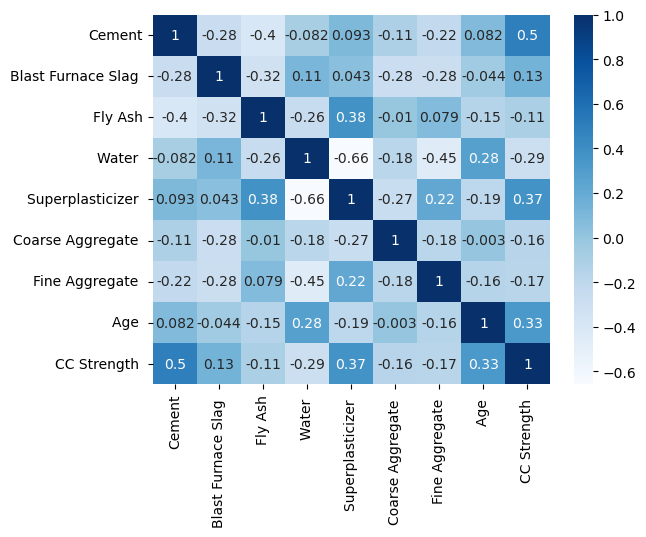

In [6]:
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

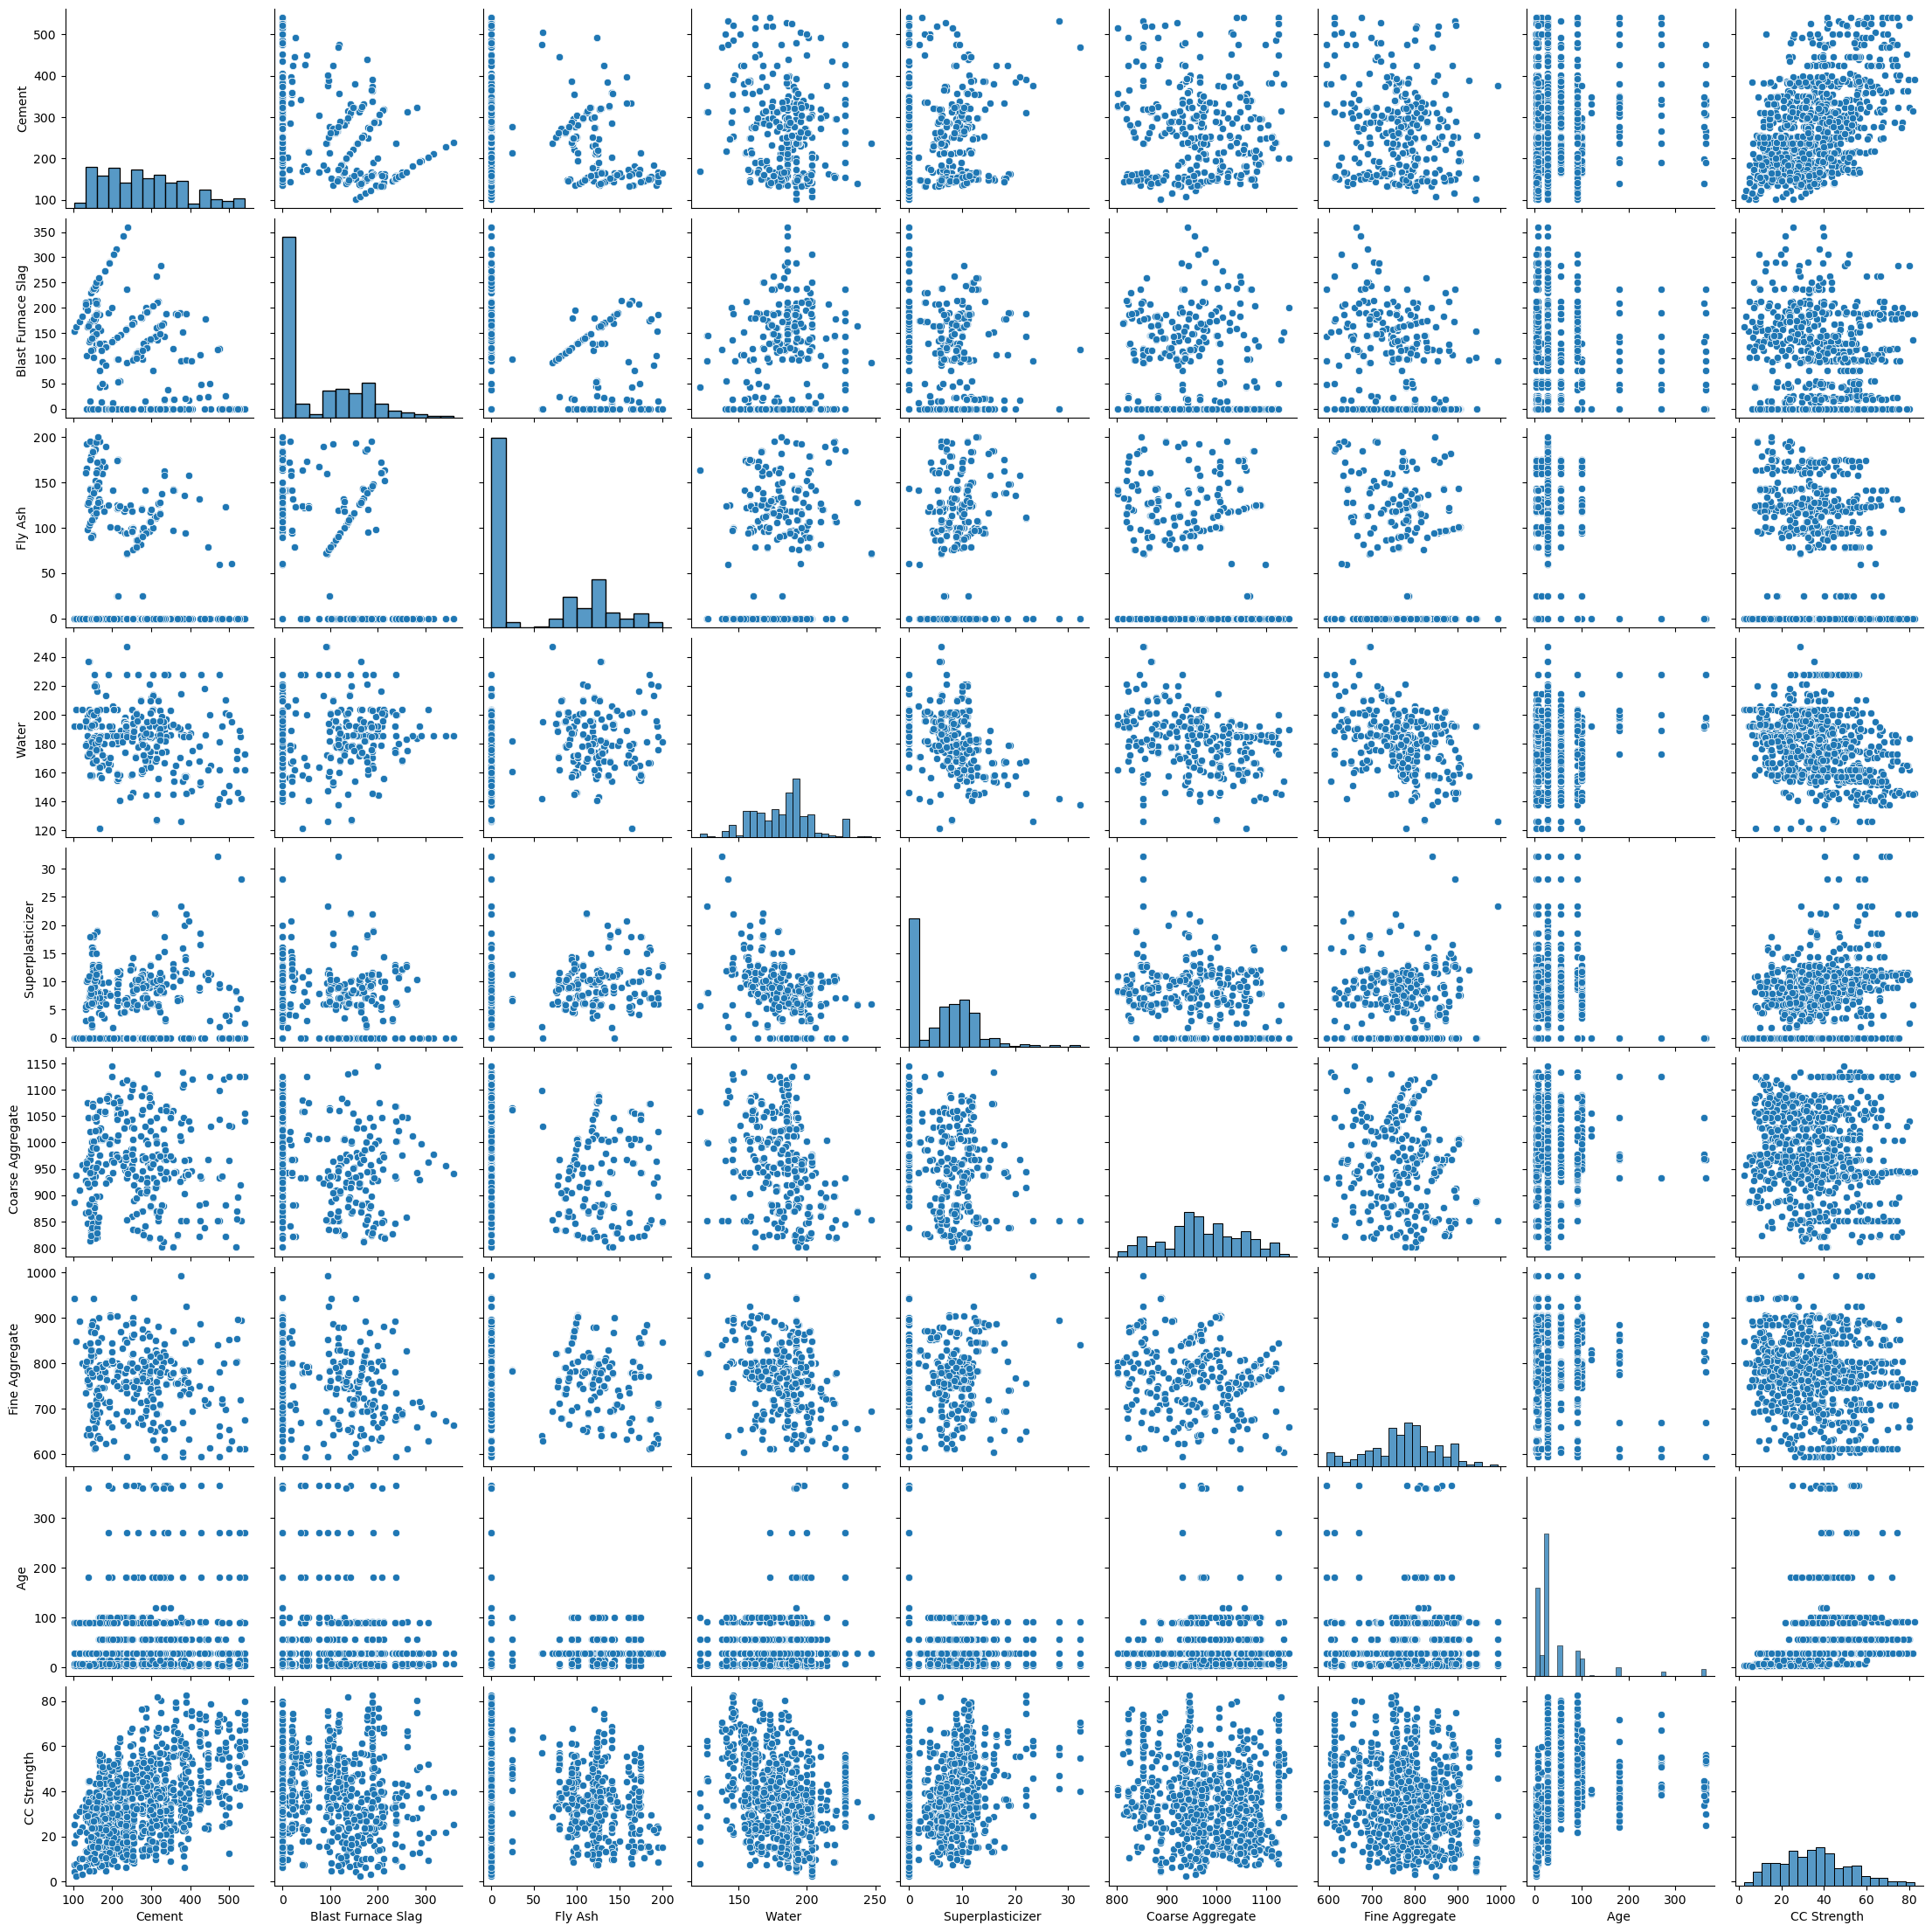

In [7]:
sns.pairplot(concrete)
plt.show()

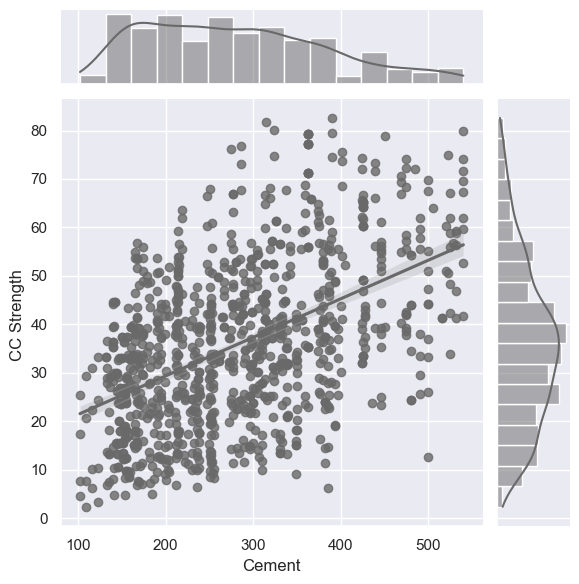

In [8]:
cols = concrete.columns
color = ['dimgray', 'khaki', 'mediumorchid','cornflowerblue', 'crimson','orangered', 'navy', 'salmon']
sns.set(font_scale=1)

sns.jointplot(data=concrete, x=cols[0], y=cols[-1]
                  ,kind='reg',color=color[0])
plt.show()

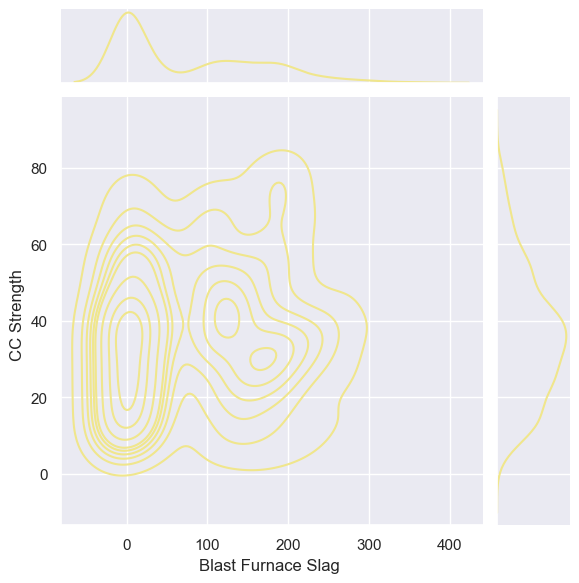

In [9]:
sns.jointplot(data=concrete, x=cols[1], y=cols[-1]
                  ,kind='kde',color=color[1])
plt.show()

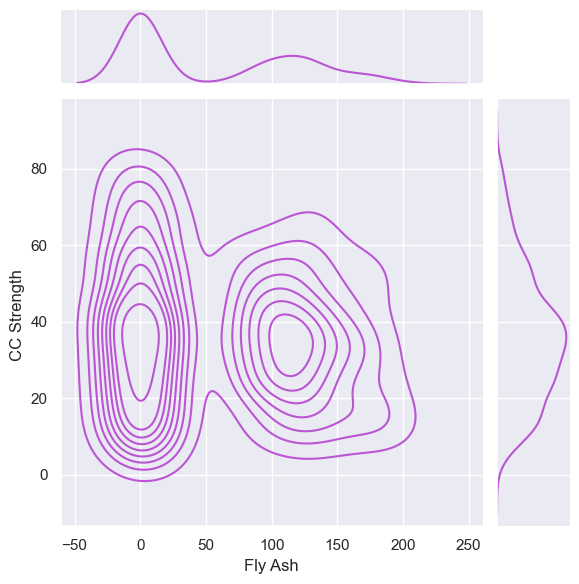

In [10]:
sns.jointplot(data=concrete, x=cols[2], y=cols[-1]
                  ,kind='kde',color=color[2])
plt.show()

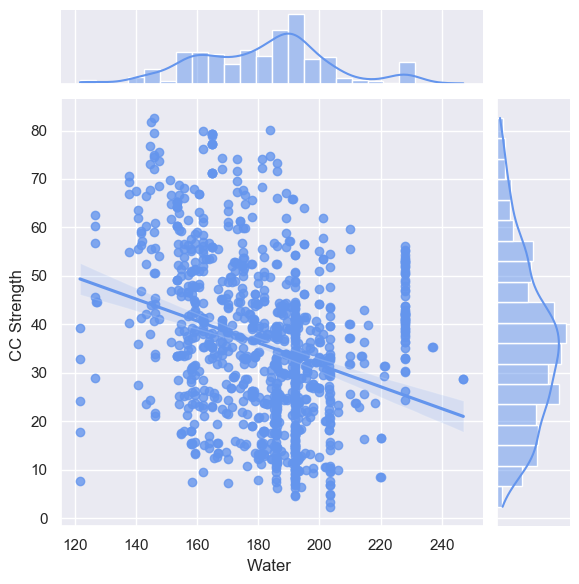

In [11]:
sns.jointplot(data=concrete, x=cols[3], y=cols[-1]
                  ,kind='reg',color=color[3])
plt.show()

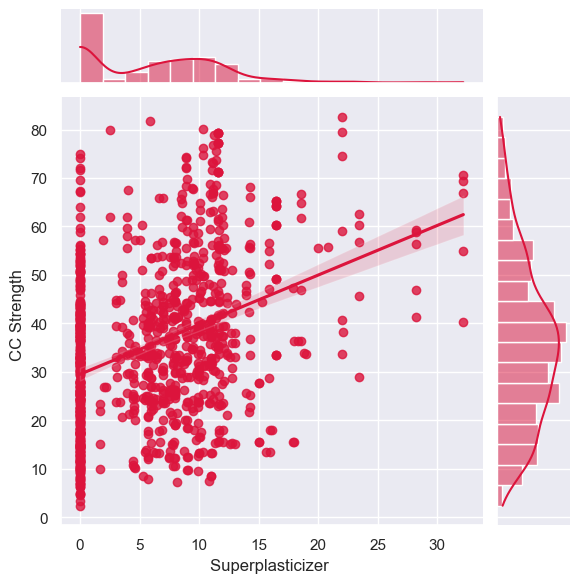

In [12]:
sns.jointplot(data=concrete, x=cols[4], y=cols[-1]
                  ,kind='reg',color=color[4])
plt.show()

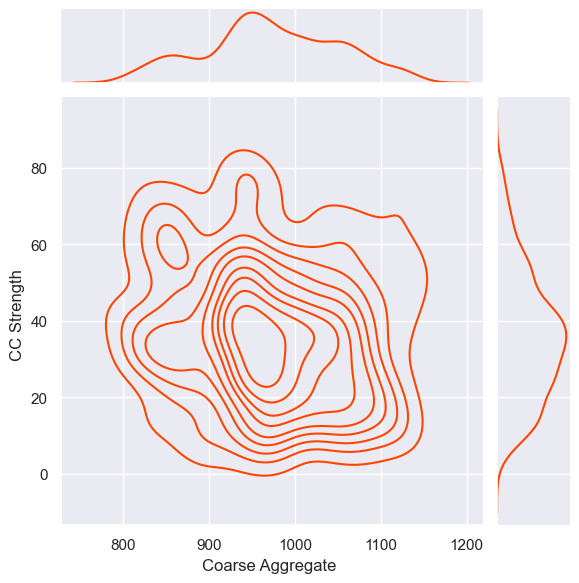

In [13]:
sns.jointplot(data=concrete, x=cols[5], y=cols[-1]
                  ,kind='kde',color=color[5])
plt.show()

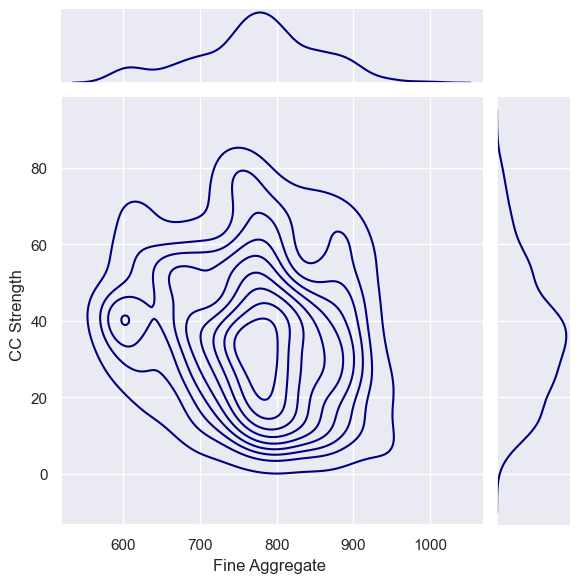

In [14]:
sns.jointplot(data=concrete, x=cols[6], y=cols[-1]
                  ,kind='kde',color=color[6])
plt.show()

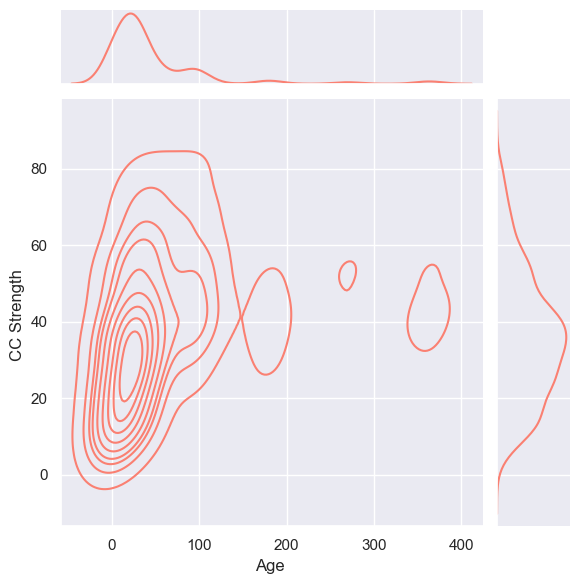

In [15]:
sns.jointplot(data=concrete, x=cols[7], y=cols[-1]
                  ,kind='kde',color=color[7])
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler
features= concrete.iloc[:, :-1].to_numpy()
features_standardized=StandardScaler().fit_transform(features)
features_standardized

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [17]:
target = concrete.iloc[:, -1]
target

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: CC Strength , Length: 1030, dtype: float64

In [18]:
X=features_standardized
X

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [19]:
y=target
y

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: CC Strength , Length: 1030, dtype: float64

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)
model = LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

93.95803891923904

In [21]:
from sklearn.linear_model import ElasticNet

model=ElasticNet()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

116.91240211041794

In [22]:
y_test

269    15.437368
364    18.016008
759    27.337723
28     37.427515
512    32.109882
         ...    
130    74.697830
726    14.306627
449    35.852752
998    30.123206
305    41.885667
Name: CC Strength , Length: 258, dtype: float64

In [23]:
from sklearn.linear_model import Ridge
model=Ridge()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

93.76496169968641

In [24]:
from sklearn.linear_model import Lasso
model=Lasso()

model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)

102.11955550606149

In [25]:
features_standardized

array([[ 2.47791782, -0.85688631, -0.84713204, ...,  0.86316012,
        -1.21765845, -0.27973311],
       [ 2.47791782, -0.85688631, -0.84713204, ...,  1.05617041,
        -1.21765845, -0.27973311],
       [ 0.49144303,  0.79553263, -0.84713204, ..., -0.52651395,
        -2.24091255,  3.55306569],
       ...,
       [-1.2700575 ,  0.75958527,  0.85066095, ..., -1.03606111,
         0.08012724, -0.27973311],
       [-1.16857975,  1.3080724 , -0.84713204, ...,  0.21464556,
         0.19118775, -0.27973311],
       [-0.19401043,  0.30850389,  0.37696733, ..., -1.39506025,
        -0.15072887, -0.27973311]])

In [26]:
val_data = {'Cement': [175.0, 320.0, 320.0, 320.0, 530.0],
        'BlastFurnaceSlag': [13.0, 0.0, 0.0, 73.0, 359.0],
        'FlyAsh': [172.0, 0.0, 126.0, 54.0, 200.0],
        'CoarseAggregate': [1000.0, 970.0, 860.0, 972.0, 1145.0],
        'FineAggregate': [856.0, 850.0, 856.0, 773.0, 992.0],
        'Water': [156.0, 192.0, 209.0, 181.0, 247.0],
        'Superplasticizer': [4.0, 0.0, 5.7, 6.0, 32.0],
        'Age': [3.0, 7.0, 28.0, 45.0, 365.0]}

# Create a dataframe from the dictionary
validation_set = pd.DataFrame(val_data)
val_data=StandardScaler().fit_transform(validation_set)

In [27]:
validation_set

,Cement,BlastFurnaceSlag,FlyAsh,CoarseAggregate,FineAggregate,Water,Superplasticizer,Age
0,175.0,13.0,172.0,1000.0,856.0,156.0,4.0,3.0
1,320.0,0.0,0.0,970.0,850.0,192.0,0.0,7.0
2,320.0,0.0,126.0,860.0,856.0,209.0,5.7,28.0
3,320.0,73.0,54.0,972.0,773.0,181.0,6.0,45.0
4,530.0,359.0,200.0,1145.0,992.0,247.0,32.0,365.0


In [28]:
model=Ridge()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
mean_squared_error(y_pred,y_test)


93.76496169968641

In [29]:
model.predict(val_data)

array([  9.48388612,  13.9814386 ,  30.90057523,  23.71771989,
       102.1521777 ])

#Build an interface to allow users to enter concrete mixtures and return an estimated strength and an assessment of the uncertainty in the estimate

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df = pd.read_excel("concreteData.xlsx")
df.head() #we gonna use the first row to check if our interface is correct or not

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,CC Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [33]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import warnings
concrete_data = pd.read_excel("concreteData.xlsx")

scaler = StandardScaler()
X = scaler.fit_transform(concrete_data.iloc[:, :-1])
y = concrete_data.iloc[:, -1]

model = Ridge() # used the ridge model 
model.fit(X, y)

def predict_strength(cement, blast_furnace_slag, fly_ash, coarse_aggregate, fine_aggregate, water, superplasticizer, age): #function to predict the cc strength
    mixture = np.array([[cement, blast_furnace_slag, fly_ash, coarse_aggregate, fine_aggregate, water, superplasticizer, age]])
    standardized_mixture = scaler.transform(mixture)
    predicted_strength = model.predict(standardized_mixture)[0]
    std_error = np.sqrt(mean_squared_error(model.predict(X), y))
    return predicted_strength, std_error

print("Enter the proportions of each component in your concrete mixture (in kg/m^3):") #input variables for people to put
cement = float(input("Cement: "))
blast_furnace_slag = float(input("Blast Furnace Slag: "))
fly_ash = float(input("Fly Ash: "))
coarse_aggregate = float(input("Coarse Aggregate: "))
fine_aggregate = float(input("Fine Aggregate: "))
water = float(input("Water: "))
superplasticizer = float(input("Superplasticizer: "))
age = float(input("Age (in days): "))
warnings.filterwarnings('ignore')

predicted_strength, std_error = predict_strength(cement, blast_furnace_slag, fly_ash, coarse_aggregate, fine_aggregate, water, superplasticizer, age)#the concrete strength

print(f"\nEstimated Concrete Strength: {predicted_strength:.2f} MPa")
print(f"Uncertainty in Estimate: ±{std_error:.2f} MPa")


Enter the proportions of each component in your concrete mixture (in kg/m^3):


Cement:  540.0
Blast Furnace Slag:  0.0
Fly Ash:  0.0
Coarse Aggregate:  1040.0
Fine Aggregate:  676.0
Water:  162.0
Superplasticizer:  2.5
Age (in days):  28



Estimated Concrete Strength: 85.97 MPa
Uncertainty in Estimate: ±10.35 MPa


# After putting the same values from the first row above in our user interface, the output it's close to the cc strentgh given in the dataframe. So,our interface is working quite well.